In [10]:
import sys
sys.path.append('../../')

import numpy as np

from helper import *

In [11]:
class minibatch_momentum:
    def mse_loss(self, x):
        y_pred = np.dot(self.X, x[0])
        mse = np.mean((self.y - y_pred) ** 2)
        return mse

    def mse_loss_grad(self, x):
        # Choose n random data points from the training set without replacement
        indices = np.random.choice(self.X.shape[0], self.batch_size, replace=False)
        X_batch = self.X[indices, :]
        y_batch = self.y[indices]

        # Compute the gradient of the MSE loss with respect to x for the chosen data points
        y_pred = np.dot(X_batch, x)
        grad = 2 * np.dot(X_batch.T, (y_pred - y_batch))

        # Sum values in rows of grad and divide by n
        grad_mean = np.sum(grad, axis=1) / self.batch_size

        return grad_mean
    
    def __init__(self, X, y, batch_size=2, method='mse'):
        self.X = X
        self.y = y
        self.batch_size = batch_size

        if self.batch_size > X.shape[0]:
            self.batch_size = X.shape[0]

        if method == 'mse':
            self.f = self.mse_loss 
            self.grad = self.mse_loss_grad
        else:
            print('method not found')
        

    def constant_lr_scheduling(epoch, initial_lr):
        return initial_lr

    def gradient_descent(self, x0, lr_scheduling_func=constant_lr_scheduling, initial_lr=0.001, max_epochs=1000, eps=1e-5, eps_adagrad=1e-5, minimum = 0.0, apply_min=False, apply_value=True):
        """
        Cтохастический градиентный спуск для поиска минимума функции.

        Аргументы:
            x0 (list): Начальную точка, с которой начинается поиск.
            initial_lr (float): learning_rate - Начальная скорость обучения или шаг градиентного спуска.
            max_epochs (int): Максимальное количество эпох или итераций для выполнения алгоритма.
            minimum (float): Минимум функции.
            epsilon (float): Малое число, используемое как критерий останова для алгоритма.
        Возвращает:
            Список всех точек, посещенных во время алгоритма.
        """
        return custom_gradient_descent_with_lr_scheduling_and_adagrad(self.f, self.grad, x0, lr_scheduling_func, initial_lr, max_epochs, eps, eps_adagrad, minimum, apply_min, apply_value)
    
    def get_loss_history(self, results):
        loss_history = []

        for i in range(len(results)):
            loss_history.append(self.f(results[i]))

        return loss_history
    


In [12]:
from tqdm import tqdm

def research_minibatch_calculation(n_tests=1):
    results = []

    real_weight, real_bias = 2, 0

    dots_count = 500
    variance = 0.5
    X = np.random.rand(dots_count, 1)
    y = real_weight * X + real_bias + (np.random.rand(dots_count, 1) * variance - variance / 2)
    loss_real = minibatch_momentum(X, y).get_loss_history([[real_weight]])[-1]

    for i in tqdm(range(1, X.shape[0] + 1)):
        count_sum = 0
        for j in range(n_tests):
            sgd = minibatch_momentum(X, y, batch_size=i)
            loss_real = sgd.get_loss_history([[real_weight]])[-1]
            result = sgd.gradient_descent(np.array([0], float), max_epochs=4000, initial_lr=0.1, eps=loss_real+(loss_real), eps_adagrad=1e-5, apply_min=True, apply_value=True)
            count_sum += len(result)
        results.append(count_sum / n_tests)
        
        # print(results[-1])
        if results[-1] > 500:
            break
    
    return results

In [22]:
def research_minibatch_view(results, start=None, end=None):
    if start is None:
        start = 1
    if end is None:
        end = len(results)

    # График n_epochs
    plt.plot(range(start, end+1), results[start-1:end], marker='o', linewidth=3, markersize=3, label='Minibatch GD Adagrad')
    plt.xlabel('Batch size')
    plt.ylabel('n epochs')
    plt.legend()

    # plt.savefig('Adagrad.png', dpi=2048, bbox_inches=0, transparent=True)

    plt.show()

In [14]:
results = research_minibatch_calculation(n_tests=10)

100%|██████████| 500/500 [06:43<00:00,  1.24it/s]


In [15]:
print(results)

[328.1, 209.8, 171.7, 159.5, 155.9, 149.9, 154.0, 149.6, 146.9, 147.1, 144.2, 145.3, 146.7, 138.0, 136.9, 139.4, 137.2, 140.2, 138.8, 139.7, 139.6, 137.5, 134.8, 138.2, 136.4, 134.2, 136.8, 138.2, 136.8, 137.9, 138.8, 134.2, 137.1, 135.2, 137.6, 136.3, 136.6, 134.6, 133.7, 135.7, 135.4, 133.9, 135.5, 135.3, 137.1, 136.2, 134.8, 134.3, 133.8, 133.0, 135.3, 135.2, 134.0, 134.0, 135.3, 134.6, 136.2, 136.9, 133.7, 136.5, 133.0, 133.6, 134.9, 135.5, 135.1, 135.3, 134.5, 135.8, 135.1, 133.7, 136.1, 135.0, 134.5, 134.7, 135.4, 135.2, 133.7, 134.2, 136.2, 134.0, 135.3, 134.8, 133.7, 135.6, 135.0, 135.2, 134.0, 133.5, 134.2, 134.7, 134.4, 135.2, 135.5, 136.0, 134.4, 134.3, 134.7, 134.0, 135.7, 136.1, 135.1, 134.3, 134.7, 134.6, 134.1, 133.7, 134.4, 134.3, 134.5, 134.0, 133.4, 133.3, 133.3, 133.9, 135.0, 134.6, 135.1, 134.0, 134.2, 134.6, 132.8, 133.3, 134.9, 133.5, 134.5, 133.4, 134.5, 134.2, 133.1, 134.7, 133.7, 133.9, 134.2, 133.2, 134.3, 133.1, 133.7, 133.1, 134.7, 133.8, 133.2, 134.1, 133.1

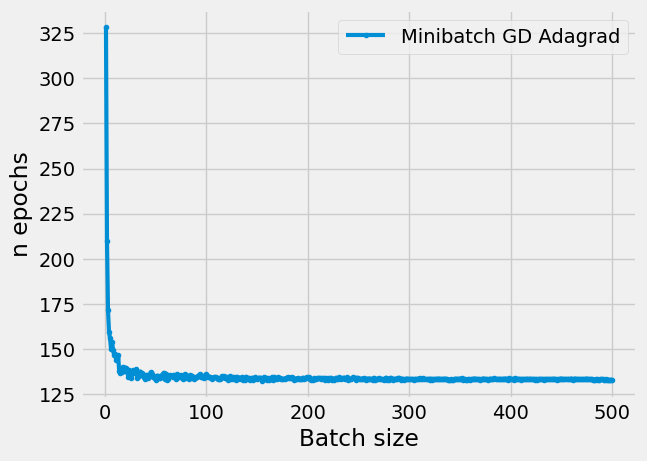

In [21]:
research_minibatch_view(results)

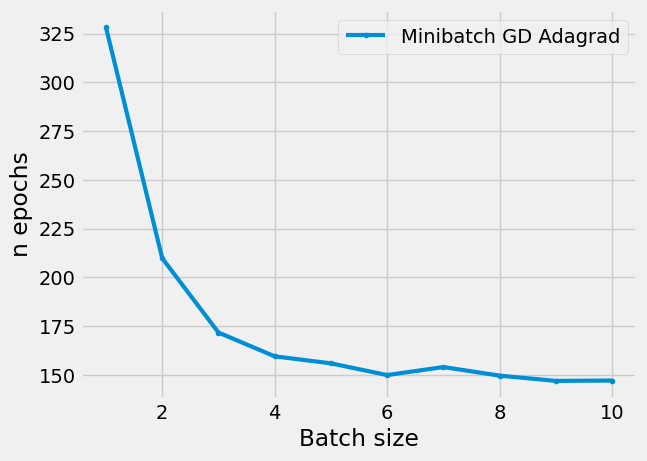

In [17]:
research_minibatch_view(results, 1, 10)

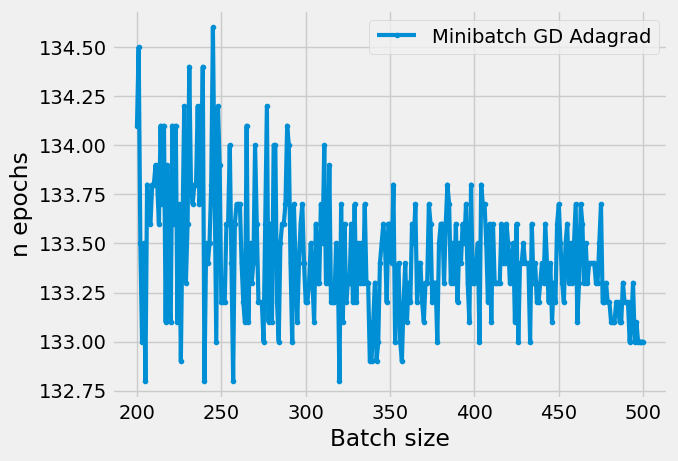

In [18]:
research_minibatch_view(results, 200, 500)